1 

Train data shape: (1460, 81)
Test data shape: (1459, 80)
2 

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  Y

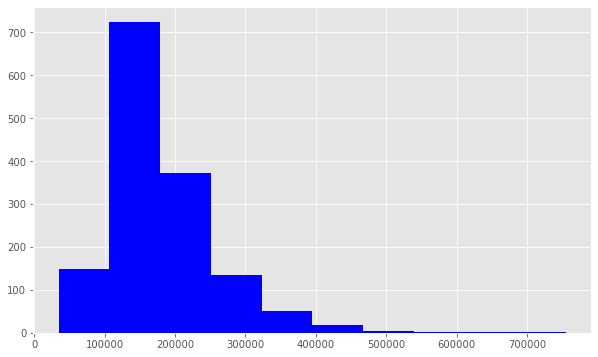

5 


 Skew is: 0.12133506220520406


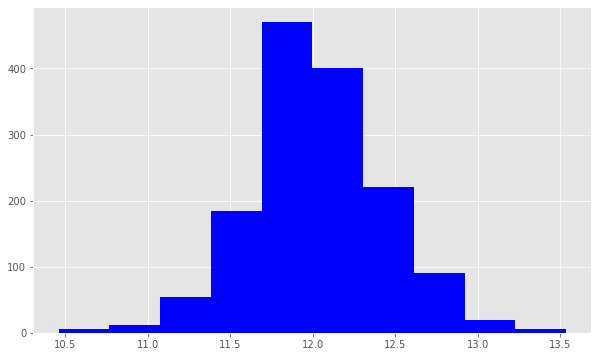

6 

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object
7 

SalePrice      1.000000
Over

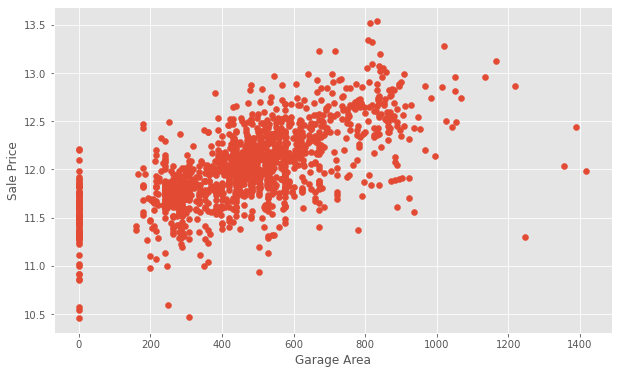

13 



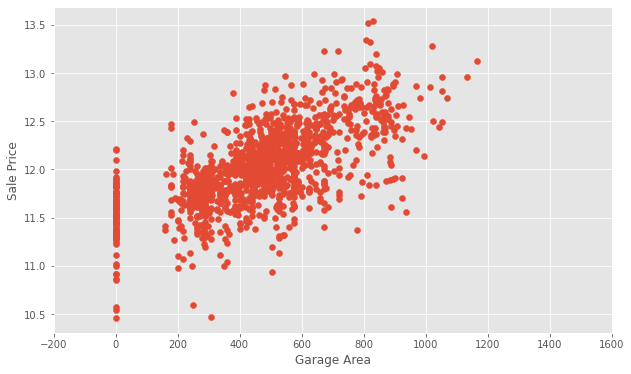

14 

              Null Count
Feature                 
PoolQC              1449
MiscFeature         1402
Alley               1364
Fence               1174
FireplaceQu          689
LotFrontage          258
GarageYrBlt           81
GarageCond            81
GarageType            81
GarageFinish          81
GarageQual            81
BsmtFinType2          38
BsmtExposure          38
BsmtQual              37
BsmtCond              37
BsmtFinType1          37
MasVnrArea             8
MasVnrType             8
Electrical             1
Id                     0
Functional             0
Fireplaces             0
KitchenQual            0
KitchenAbvGr           0
BedroomAbvGr           0
15 

16 

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1455   1455    91     1455        1455      1455      1455   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1147   

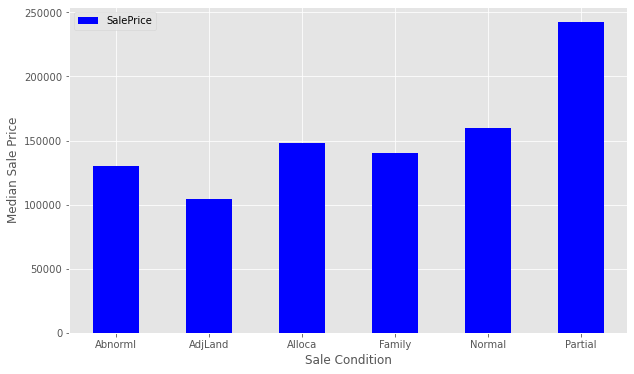

20 



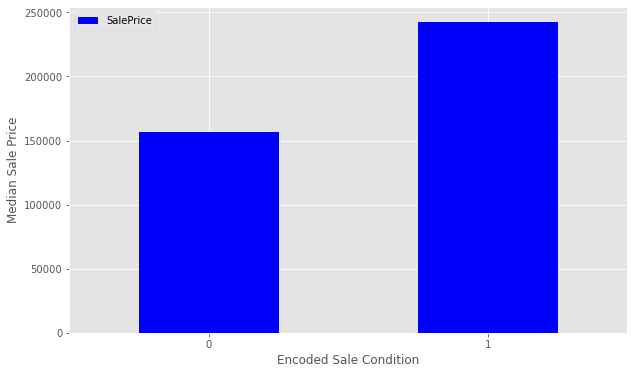

21 

0
22 

23 

R^2 is: 
 0.8882477709262533


In [4]:
import pandas as pd                 # for working with data in Python
import numpy as np
import matplotlib.pyplot as plt     # for visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

# use Pandas to read in csv files. The pd.read_csv() method creates a DataFrame from a csv file
train = pd.read_csv('houseprice/train.csv')
test = pd.read_csv('houseprice/test.csv')
print("1 \n")

# check out the size of the data
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)



print("2 \n")

# look at a few rows using the DataFrame.head() method
# train.head()
print(train.head())

#to do some plotting
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)


#######################################################
#  2. Explore the data and engineer Features          ###
#######################################################

print("3 \n")

# to get more information like count, mean, std, min, max etc
# train.SalePrice.describe()
print (train.SalePrice.describe())

print("4 \n")

# to plot a histogram of SalePrice
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

print("5 \n")

# use np.log() to transform train.SalePric and calculate the skewness a second time, as well as re-plot the data
target = np.log(train.SalePrice)
print ("\n Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()



#######################################################
#   Working with Numeric Features                   ###
#######################################################

print("6 \n")

# return a subset of columns matching the specified data types
numeric_features = train.select_dtypes(include=[np.number])
# numeric_features.dtypes
print(numeric_features.dtypes)

print("7 \n")

# displays the correlation between the columns and examine the correlations between the features and the target.
corr = numeric_features.corr()

# The first five features are the most positively correlated with SalePrice, while the next five are the most negatively correlated.
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

print("8 \n")

"""
#to get the unique values that a particular column has.
#train.OverallQual.unique()
print(train.OverallQual.unique())
"""
print("9 \n")
"""
#investigate the relationship between OverallQual and SalePrice.
#We set index='OverallQual' and values='SalePrice'. We chose to look at the median here.
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
print(quality_pivot)
"""
print("10 \n")
"""
#visualize this pivot table more easily, we can create a bar plot
#Notice that the median sales price strictly increases as Overall Quality increases.
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()
"""
print("11 \n")
"""
#to generate some scatter plots and visualize the relationship between the Ground Living Area(GrLivArea) and SalePrice
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()
"""
print("12 \n")

# do the same for GarageArea.
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()



#######################################################
# create a new dataframe with some outliers removed ###
#######################################################

print("13 \n")

# create a new dataframe with some outliers removed
train = train[train['GarageArea'] < 1200]

# display the previous graph again without outliers
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600)     # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()



######################################################
#   Handling Null Values                            ##
######################################################

print("14 \n")

# create a DataFrame to view the top null columns and return the counts of the null values in each column
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
#nulls
print(nulls)

print("15 \n")
"""
#to return a list of the unique values
print ("Unique values are:", train.MiscFeature.unique())
"""

######################################################
#   Wrangling the non-numeric Features              ##
######################################################

print("16 \n")

# consider the non-numeric features and display details of columns
categoricals = train.select_dtypes(exclude=[np.number])
#categoricals.describe()
print(categoricals.describe())


######################################################
#   Transforming and engineering features           ##
######################################################

print("17 \n")

# When transforming features, it's important to remember that any transformations that you've applied to the training data before
# fitting the model must be applied to the test data.

#Eg:
print ("Original: \n")
print (train.Street.value_counts(), "\n")

print("18 \n")

# our model needs numerical data, so we will use one-hot encoding to transform the data into a Boolean column.
# create a new column called enc_street. The pd.get_dummies() method will handle this for us
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first=True)

print ('Encoded: \n')
print (train.enc_street.value_counts())  # Pave and Grvl values converted into 1 and 0

print("19 \n")

# look at SaleCondition by constructing and plotting a pivot table, as we did above for OverallQual
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

# encode this SaleCondition as a new feature by using a similar method that we used for Street above
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

print("20 \n")

# explore this newly modified feature as a plot.
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

######################################################################################################
#   Dealing with missing values                                                                      #
#   We'll fill the missing values with an average value and then assign the results to data          #
#   This is a method of interpolation                                                                #
######################################################################################################
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

print("21 \n")
# Check if the all of the columns have 0 null values.
# sum(data.isnull().sum() != 0)
print(sum(data.isnull().sum() != 0))

print("22 \n")

######################################################
#  3. Build a linear model                             ##
######################################################

# separate the features and the target variable for modeling.
# We will assign the features to X and the target variable(Sales Price)to y.

y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)
# exclude ID from features since Id is just an index with no relationship to SalePrice.

#======= partition the data ===================================================================================================#
#   Partitioning the data in this way allows us to evaluate how our model might perform on data that it has never seen before.
#   If we train the model on all of the test data, it will be difficult to tell if overfitting has taken place.
#==============================================================================================================================#
# also state how many percentage from train data set, we want to take as test data set
# In this example, about 33% of the data is devoted to the hold-out set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)


#========= Begin modelling =========================#
#    Linear Regression Model                        #
#===================================================#

# ---- first create a Linear Regression model.
# First, we instantiate the model.
lr = linear_model.LinearRegression()

# ---- fit the model / Model fitting
# lr.fit() method will fit the linear regression on the features and target variable that we pass.
model = lr.fit(X_train, y_train)

print("23 \n")

# ---- Evaluate the performance and visualize results
# r-squared value is a measure of how close the data are to the fitted regression line
# a higher r-squared value means a better fit(very close to value 1)
print("R^2 is: \n", model.score(X_test, y_test))

# use the model we have built to make predictions on the test data set.
predictions = model.predict(X_test)

print("24 \n")
# calculates the rmse
print('RMSE is: \n', mean_squared_error(y_test, predictions))

print("25 \n")
# view this relationship between predictions and actual_values graphically with a scatter plot.
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()


#====== improve the model ================================================================#
#  try using Ridge Regularization to decrease the influence of less important features    #
#=========================================================================================#

print("26 \n")
# experiment by looping through a few different values of alpha, and see how this changes our results.

for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

# if you examined the plots you can see these models perform almost identically to the first model.
# In our case, adjusting the alpha did not substantially improve our model.

print("27 \n")
print("R^2 is: \n", model.score(X_test, y_test))

######################################################
#    4.  Make a submission                          ##
######################################################

# create a csv that contains the predicted SalePrice for each observation in the test.csv dataset.
submission = pd.DataFrame()
# The first column must the contain the ID from the test data.
submission['Id'] = test.Id

# select the features from the test data for the model as we did above.
feats = test.select_dtypes(
    include=[np.number]).drop(['Id'], axis=1).interpolate()

# generate predictions
predictions = model.predict(feats)

# transform the predictions to the correct form
# apply np.exp() to our predictions becasuse we have taken the logarithm(np.log()) previously.
final_predictions = np.exp(predictions)

print("28 \n")

# check the difference
print("Original predictions are: \n", predictions[:10], "\n")
print("Final predictions are: \n", final_predictions[:10])

print("29 \n")
# assign these predictions and check
submission['SalePrice'] = final_predictions
# submission.head()
print(submission.head())

# export to a .csv file as Kaggle expects.
# pass index=False because Pandas otherwise would create a new index for us.
submission.to_csv('submission1.csv', index=False)


print("\n Finish")
